# Logistische Regression mit Python

Für dieses Projekt verwende ich den Titanic Datensatz von Kaggle. 
Ich versuche eine Klassifizeirung vorherzusagen - überlebt oder verstorben. 



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Die Daten

In [6]:
train = pd.read_csv('C:/Users/User.HP/Titanic/titanic.csv')

In [8]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Fehlende Daten (en. missing data)


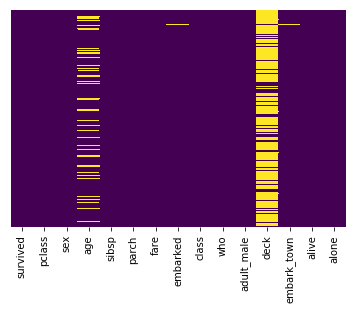

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

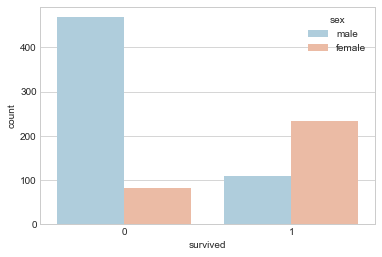

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=train,palette='RdBu_r')

# Überlebende der Titanic nach klasse

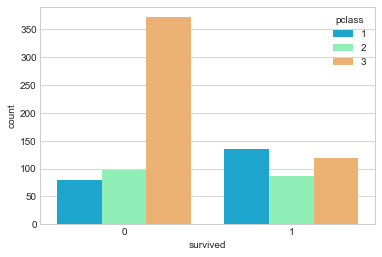

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=train,palette='rainbow')

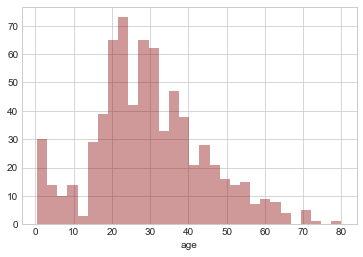

In [19]:
sns.distplot(train['age'].dropna(),kde=False,color='darkred',bins=30)

 Anzahl der Geschwister-Ehegatten an Bord

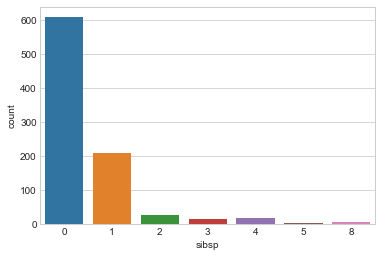

In [22]:
sns.countplot(x='sibsp',data=train)

# Datenbereinigung

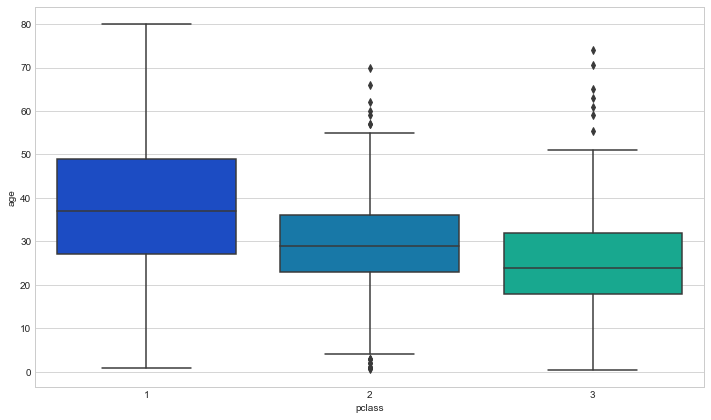

In [24]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='pclass',y='age',data=train,palette='winter')

Durchschnitte des Alter anhand der Pclass einzusetzen. Die Durchschnitte des Alter wir in den Fehlende Daten gespeichert

In [35]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [36]:
train['age'] = train[['age','pclass']].apply(impute_age,axis=1)

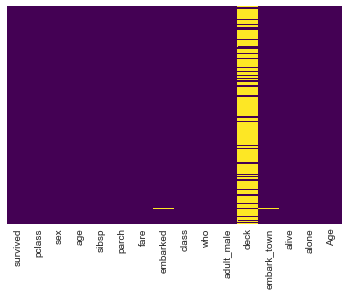

In [37]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

 kategorische Inhalte

In [44]:
sex = pd.get_dummies(train['sex'],drop_first=True)
embark = pd.get_dummies(train['embarked'],drop_first=True)

In [47]:
train = pd.concat([train,sex,embark],axis=1)

In [60]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,1,0,1


# logistischen Regression

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('survived',axis=1), 
                                                    train['survived'], test_size=0.30, 
                                                    random_state=101)

# Training und Vorhersage


Die Logistichen Regression wird nur mit den Spalte PassengerId
Survived
(Pclass
Age
SibSp
Parch
Fare
male
Q
S)
berechnert

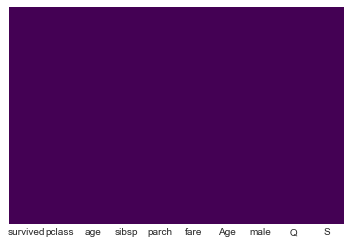

In [88]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [89]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
predictions = logmodel.predict(X_test)

# Auswertung

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.86      0.81       154
          1       0.78      0.65      0.71       114

avg / total       0.77      0.77      0.77       268

